# Lending Club Loans

## Brief Introduction
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

## Objective
Building a model that predicts whether the borrower can payback the loan or not, so in the future we can assess the customer and whether or not he's likely to payback his loan.

## Main Strategy
Our main objective is not lending a person that is not going to payback his loan which would be a Type 1 error, Therefore we must depend on the recall score of the loans not payed category by doing methods that might reduce our accuracy but ultimately increasing our recall. 

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

### Loading the info file that describes our columns

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

### Creating a function that describes each column

In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [4]:
feat_info('mort_acc')

Number of mortgage accounts.


### Loading the main data set

In [5]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

## Exploratory Data Analysis

In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

#### Getting a general idea of datatypes and null values for each column

In [8]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### Plotting a countplot for the subcategories

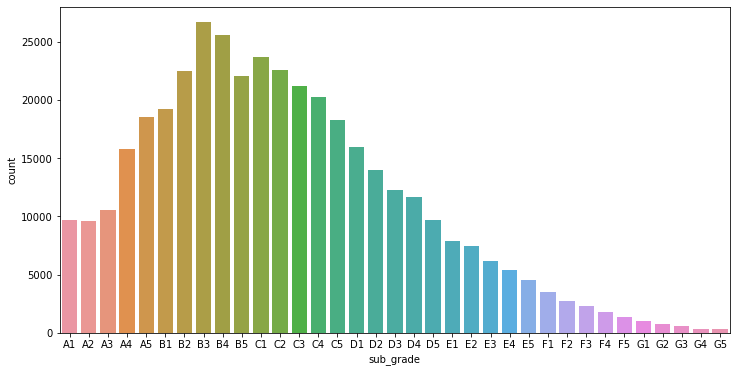

In [9]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'sub_grade', data = df, order= sorted(df.sub_grade.unique()));

#### Checking the value counts for the Loan Status

In [10]:
df.loan_status.value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

### Plotting a Pie chart to show the difference in magnitude of Fully Paid loans and Charged Off loans

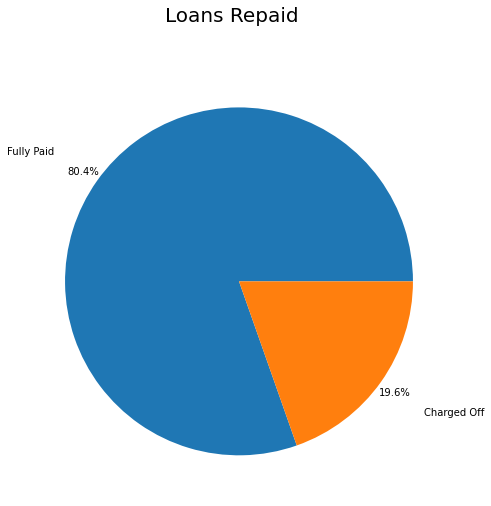

In [11]:
fully_paid = df.loan_status.value_counts()[0]
charged_off = df.loan_status.value_counts()[1]

labels = [ 'Fully Paid', 'Charged Off']
sizes = [fully_paid, charged_off]

plt.figure(figsize=(8,8))
plt.suptitle("Loans Repaid", fontsize= 20)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow= False, labeldistance= 1.3, pctdistance= 1.1);

#### Imbalance between Fully Paid and being Charged Off that can negatively affect our model that tries to have a high recall score for the Charged Off label by overfitting to the Fully Paid portion

## Downsampling the Fully Paid portion

In [12]:
fully_paid = df[df.loan_status == 'Fully Paid']
charged_off = df[df.loan_status == 'Charged Off']
fully_paid.shape, charged_off.shape

((318357, 27), (77673, 27))

### Downsampling the fully paid portion to the size of the Charged Off portion

In [13]:
downsampling_paid = resample(fully_paid, replace = False, n_samples= charged_off.shape[0], random_state=42)

df = pd.concat([charged_off, downsampling_paid])
df.shape

(155346, 27)

In [14]:
df.loan_status.value_counts()

Charged Off    77673
Fully Paid     77673
Name: loan_status, dtype: int64

### Checking for outliers in our data

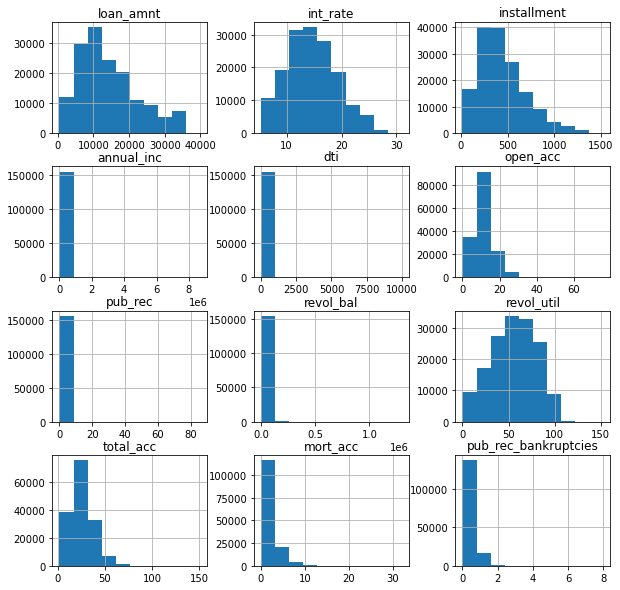

In [15]:
df.hist(figsize= (10,10));

### Removing outliers that may which can result in misleading interpretations. 

In [16]:
revol_bal_99 = df.revol_bal.quantile(0.995)
annual_inc_99 = df.annual_inc.quantile(0.995)
revol_util_99 = df.revol_util.quantile(0.9999)
revol_bal_99, annual_inc_99 ,revol_util_99

(115751.17499999932, 300000.0, 115.57689999997964)

In [17]:
df = df[df['revol_bal'] <= revol_bal_99]
df = df[df['annual_inc'] <= annual_inc_99]
df = df[df['revol_util'] <= revol_util_99]

In [18]:
df = df[df.pub_rec < 20]
df = df[df.dti < 1000]

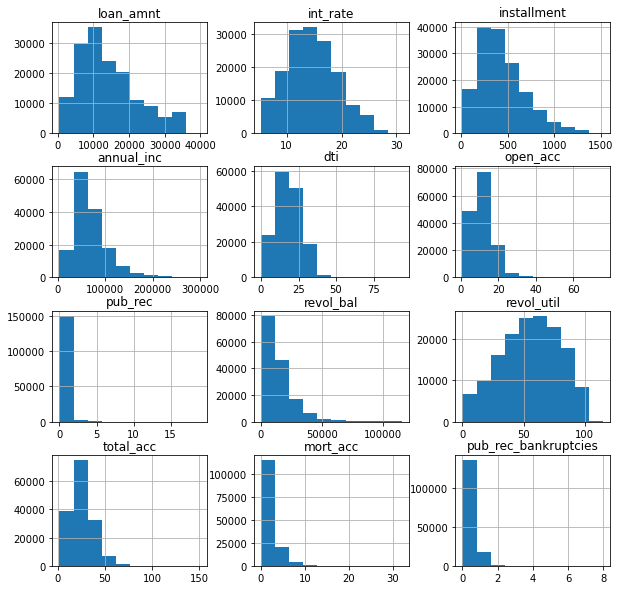

In [19]:
df.hist(figsize= (10,10));

### Checking the updated size of the DataFrame

In [20]:
df.shape

(153874, 27)

## Handling nan values and transforming strings to numeric data-types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153874 entries, 4 to 48838
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             153874 non-null  float64
 1   term                  153874 non-null  object 
 2   int_rate              153874 non-null  float64
 3   installment           153874 non-null  float64
 4   grade                 153874 non-null  object 
 5   sub_grade             153874 non-null  object 
 6   emp_title             143879 non-null  object 
 7   emp_length            145666 non-null  object 
 8   home_ownership        153874 non-null  object 
 9   annual_inc            153874 non-null  float64
 10  verification_status   153874 non-null  object 
 11  issue_d               153874 non-null  object 
 12  loan_status           153874 non-null  object 
 13  purpose               153874 non-null  object 
 14  title                 153212 non-null  object 
 15  d

In [22]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                9995
emp_length               8208
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                     662
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                13291
pub_rec_bankruptcies      195
address                     0
dtype: int64

In [23]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
25,6000.0,36 months,11.36,197.47,B,B5,CSU Monterey Bay,2 years,RENT,46680.0,...,9.0,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\r\nEast Preston,..."
26,8400.0,36 months,13.35,284.45,C,C2,Bartender,6 years,RENT,35000.0,...,6.0,0.0,6953.0,74.8,17.0,f,INDIVIDUAL,0.0,0.0,Unit 3166 Box 1862\r\nDPO AE 48052
36,3250.0,36 months,16.78,115.52,C,C5,NaN,NaN,RENT,22500.0,...,7.0,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\r\nLake Mariaton, TN 30723"
41,28000.0,60 months,19.91,312.04,E,E4,American Airlines,10+ years,RENT,52000.0,...,10.0,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\r\nMatthewtown, CT ..."


### Checking unique string values that will be One Hot Encoded

In [24]:
[df.home_ownership.unique(), df.application_type.unique(), df.term.unique(), df.verification_status.unique(),
df.initial_list_status.unique(), df.mort_acc.unique(), df.emp_title.nunique()]

[array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'], dtype=object),
 array(['INDIVIDUAL', 'DIRECT_PAY', 'JOINT'], dtype=object),
 array([' 60 months', ' 36 months'], dtype=object),
 array(['Verified', 'Not Verified', 'Source Verified'], dtype=object),
 array(['f', 'w'], dtype=object),
 array([ 1., nan,  0.,  6.,  4.,  2.,  7.,  5.,  3., 11., 10., 13.,  8.,
         9., 12., 22., 19., 16., 17., 15., 14., 18., 20., 23., 24., 26.,
        32., 27., 25.]),
 75829]

### Dropping emp_title as it has more than 75 unique string values

In [25]:
df = df.drop('emp_title', axis = 1)

In [26]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [27]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line)
df.issue_d = pd.to_datetime(df.issue_d)

In [28]:
df.earliest_cr_line.nunique(), df.issue_d.nunique()

(647, 114)

### earliest_cr_line and issue_d contain too many unique values to be encoded so we'll just use the years

In [29]:
df['earliest_cr_year'] = pd.DatetimeIndex(df.earliest_cr_line).year
df['issue_year'] = pd.DatetimeIndex(df.issue_d).year

### Dropping earliest_cr_line and issue_d after feature engineering

In [30]:
df.drop(['earliest_cr_line', 'issue_d'], axis = 1, inplace= True)

### Plotting a correlation heatmap

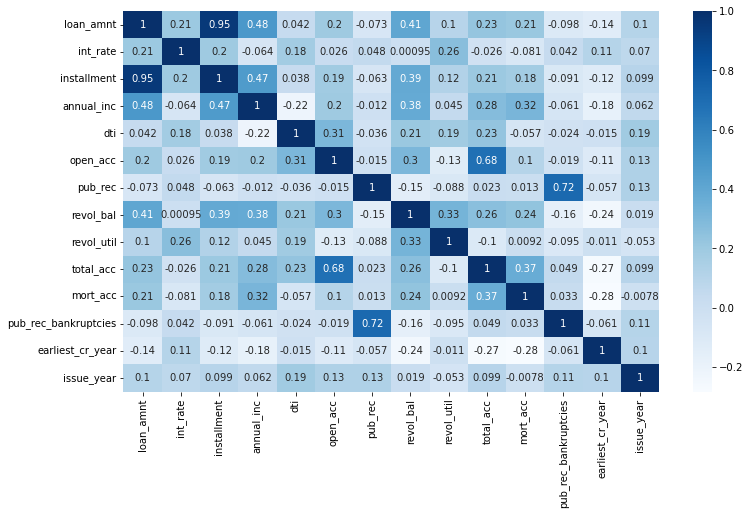

In [31]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

### Plotting installment against loan amount as they have a very high correlation

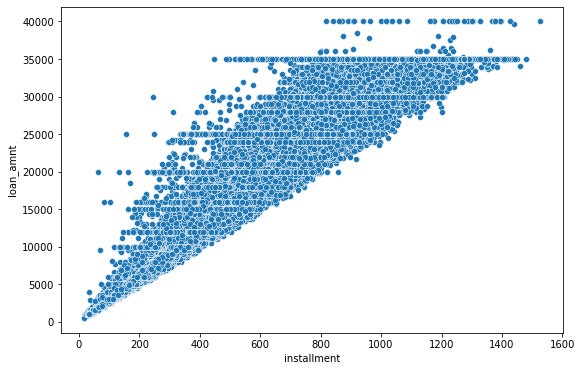

In [32]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x='installment',y='loan_amnt',data=df);

In [33]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [34]:
df.initial_list_status.unique()

array(['f', 'w'], dtype=object)

In [35]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,earliest_cr_year,issue_year
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",1999,2013
25,6000.0,36 months,11.36,197.47,B,B5,2 years,RENT,46680.0,Not Verified,...,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\r\nEast Preston,...",2003,2010
26,8400.0,36 months,13.35,284.45,C,C2,6 years,RENT,35000.0,Source Verified,...,6953.0,74.8,17.0,f,INDIVIDUAL,0.0,0.0,Unit 3166 Box 1862\r\nDPO AE 48052,2004,2014
36,3250.0,36 months,16.78,115.52,C,C5,NaN,RENT,22500.0,Verified,...,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\r\nLake Mariaton, TN 30723",2009,2013
41,28000.0,60 months,19.91,312.04,E,E4,10+ years,RENT,52000.0,Verified,...,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\r\nMatthewtown, CT ...",1988,2011


### Extracting the zip-code from the address column

In [36]:
df.address

4                    679 Luna Roads\r\nGreggshire, VA 11650
25        44130 Powers Course Suite 880\r\nEast Preston,...
26                       Unit 3166 Box 1862\r\nDPO AE 48052
36              361 Erica Forest\r\nLake Mariaton, TN 30723
41        5836 Garcia Falls Apt. 525\r\nMatthewtown, CT ...
                                ...                        
188814    24473 Matthew Lights\r\nSouth Raymondborough, ...
207563    885 Ross Square Apt. 930\r\nEast Joshua, NJ 29597
362986    71895 Ryan Forest Suite 978\r\nSouth William, ...
342295     5170 Carr Loop Suite 053\r\nJordanland, ME 70466
48838           53117 John Hollow\r\nWallaceburgh, WY 00813
Name: address, Length: 153874, dtype: object

In [37]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
df.zip_code.nunique()

10

In [38]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### Checking and dropping the title column

In [39]:
df.title.nunique()

20106

In [40]:
df.drop('title', axis = 1, inplace= True)

In [41]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length               8208
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                13291
pub_rec_bankruptcies      195
earliest_cr_year            0
issue_year                  0
05113                       0
11650                       0
22690                       0
29597                       0
30723                       0
48052                       0
70466                       0
86630                       0
93700                       0
dtype: int

### Encoding the emp_length column

In [42]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [43]:
df.emp_length.unique()

array(['9 years', '2 years', '6 years', nan, '10+ years', '3 years',
       '7 years', '5 years', '4 years', '1 year', '8 years', '< 1 year'],
      dtype=object)

In [44]:
df.emp_length = df.emp_length.map({'< 1 year':0, '1 year': 1, '2 years': 2, '3 years': 3,
                                   '4 years':4, '5 years':5, '6 years':6, '7 years': 7,
                                   '8 years': 8, '9 years':9, '10+ years': 10})

### Checking correlation of loan_status with the features

<AxesSubplot:>

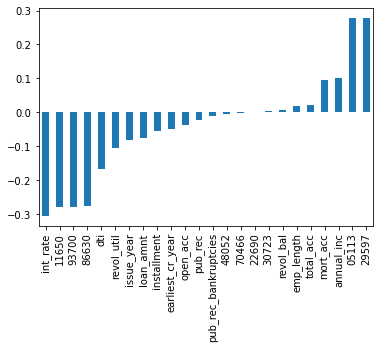

In [45]:
df.loan_status = df.loan_status.map({'Fully Paid' : 1, 'Charged Off' : 0})
df.corr().loan_status.sort_values().drop("loan_status").plot(kind = 'bar')

### Filling nan values of pub_rec_bankruptcies and emp_length with the mean value of the column

In [46]:
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.mean())
df.emp_length = df.emp_length.fillna(df.emp_length.mean())

### Encoding term

In [47]:
df.term = df.term.map({' 36 months': 0, ' 60 months': 1})

In [48]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,issue_year,05113,11650,22690,29597,30723,48052,70466,86630,93700
4,24375.0,1,17.27,609.33,C,C5,9.000000,MORTGAGE,55000.0,Verified,...,2013,0,1,0,0,0,0,0,0,0
25,6000.0,0,11.36,197.47,B,B5,2.000000,RENT,46680.0,Not Verified,...,2010,0,0,0,0,1,0,0,0,0
26,8400.0,0,13.35,284.45,C,C2,6.000000,RENT,35000.0,Source Verified,...,2014,0,0,0,0,0,1,0,0,0
36,3250.0,0,16.78,115.52,C,C5,5.899771,RENT,22500.0,Verified,...,2013,0,0,0,0,1,0,0,0,0
41,28000.0,1,19.91,312.04,E,E4,10.000000,RENT,52000.0,Verified,...,2011,0,0,1,0,0,0,0,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153874 entries, 4 to 48838
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             153874 non-null  float64
 1   term                  153874 non-null  int64  
 2   int_rate              153874 non-null  float64
 3   installment           153874 non-null  float64
 4   grade                 153874 non-null  object 
 5   sub_grade             153874 non-null  object 
 6   emp_length            153874 non-null  float64
 7   home_ownership        153874 non-null  object 
 8   annual_inc            153874 non-null  float64
 9   verification_status   153874 non-null  object 
 10  loan_status           153874 non-null  int64  
 11  purpose               153874 non-null  object 
 12  dti                   153874 non-null  float64
 13  open_acc              153874 non-null  float64
 14  pub_rec               153874 non-null  float64
 15  r

#### Getting dummies for 'term','sub_grade', 'home_ownership', 'verification_status', 'purpose', 'application_type','initial_list_status'


In [50]:
df = df.drop('grade', axis = 1)

In [51]:
[df.home_ownership.unique(),df.verification_status.unique(),
 df.purpose.unique(),df.application_type.unique(), df.initial_list_status.unique()]

[array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'], dtype=object),
 array(['Verified', 'Not Verified', 'Source Verified'], dtype=object),
 array(['credit_card', 'medical', 'debt_consolidation', 'wedding',
        'moving', 'other', 'home_improvement', 'major_purchase', 'car',
        'small_business', 'house', 'vacation', 'renewable_energy',
        'educational'], dtype=object),
 array(['INDIVIDUAL', 'DIRECT_PAY', 'JOINT'], dtype=object),
 array(['f', 'w'], dtype=object)]

In [52]:
df.home_ownership.value_counts()

MORTGAGE    72947
RENT        65967
OWN         14913
OTHER          36
NONE           11
Name: home_ownership, dtype: int64

In [53]:
df['home_ownership']=df['home_ownership'].replace(['NONE'], 'OTHER')

In [54]:
dummies = pd.get_dummies(df[['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'application_type', 'initial_list_status']],drop_first=True)
df = df.drop(['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'application_type', 'initial_list_status'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [55]:
df.shape

(153874, 81)

### Using Random Forest Regressor to predict the nan values for mort_acc

In [56]:
feat_info('mort_acc')

Number of mortgage accounts.


In [57]:
rfr = RandomForestRegressor(n_estimators= 30)

most correlated features to mort_acc are ['total_acc', 'open_acc', 'dti', 'annual_income', 'installment', 'emp_length', 'loan_amnt']

In [58]:
train_mort = df.loc[(df.mort_acc.notnull())] # extracting rows that has mort_acc as not null
test_mort = df.loc[(df.mort_acc.isnull())]  # all nan mort_acc values

y = train_mort.values[:, 13] #selecting the mort_acc column
X = train_mort.values[:, [0,3,4,5,7,8,12]] #selecting the features

rfr.fit(X, y)

predicted_mort = rfr.predict(test_mort.values[:, [0,3,4,5,7,8,12]]) # predicting the nan mort_acc values
test_mort.mort_acc = predicted_mort


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Ignoring the warning as we actually want to set a copy of the dataframe

In [59]:
df.mort_acc.fillna(test_mort.mort_acc, inplace= True)

In [60]:
df.isna().sum().sum()

0

### Determining the features and the labels

In [61]:
X = df.drop('loan_status',axis=1).values
y = df['loan_status'].values

### Splitting our data in 0.8, 0.2 split as 30000 test values should be enough

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Scaling the features using standard scaling

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
df.shape

(153874, 81)

## Creating the ANN model

In [65]:
model = Sequential()

model.add(Dense(81,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(41,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(21,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

2022-01-02 12:34:46.318282: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [66]:
model.fit(x= X_train, y= y_train, epochs = 25,batch_size = 256, validation_data=(X_test, y_test))

Epoch 1/25
481/481 [==============================] - 3s 4ms/step - loss: 0.4527 - val_loss: 0.3679
Epoch 2/25
481/481 [==============================] - 2s 4ms/step - loss: 0.3727 - val_loss: 0.3581
Epoch 3/25
481/481 [==============================] - 2s 4ms/step - loss: 0.3633 - val_loss: 0.3538
Epoch 4/25
481/481 [==============================] - 2s 3ms/step - loss: 0.3593 - val_loss: 0.3527
Epoch 5/25
481/481 [==============================] - 2s 3ms/step - loss: 0.3572 - val_loss: 0.3539
Epoch 6/25
481/481 [==============================] - 2s 3ms/step - loss: 0.3550 - val_loss: 0.3523
Epoch 7/25
481/481 [==============================] - 2s 3ms/step - loss: 0.3541 - val_loss: 0.3525
Epoch 8/25
481/481 [==============================] - 2s 4ms/step - loss: 0.3531 - val_loss: 0.3508
Epoch 9/25
481/481 [==============================] - 2s 4ms/step - loss: 0.3525 - val_loss: 0.3511
Epoch 10/25
481/481 [==============================] - 2s 3ms/step - loss: 0.3511 - val_loss: 0.3505

#### As the neural net didn't need a lot of time I didn't use callbacks and early stopping and just did trial and error to see when converging would occur 

### Saving our model

In [67]:
model.save('ann_model.h5') 

### checking the losses for every epoch

<AxesSubplot:>

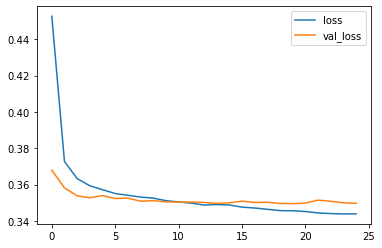

In [68]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [69]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     15293
           1       0.81      0.80      0.81     15482

    accuracy                           0.81     30775
   macro avg       0.81      0.81      0.81     30775
weighted avg       0.81      0.81      0.81     30775



## Conclusion:
### We get a well rounded classification report, and we get a recall score of 0.81 and an accuracy score of 0.81, we can further tune our model and get better recall score for charging off for example but that may affect our overall accuracy and that depends on how we want our model to perform.